<a href="https://colab.research.google.com/github/JL-plusUltra/DataScience/blob/main/RawHouse_KNN_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import folium
from folium.plugins import FastMarkerCluster
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

from geopy import Nominatim

from pandas import DataFrame
from numpy import arange
from pandas import read_csv
from matplotlib import pyplot

from scipy.stats import multivariate_normal as mvn


In [ ]:
#start here with an address
geolocater = Nominatim(user_agent="unsupLearners")
location = geolocater.geocode("401 N Sierra Vista Dr, Tucson")

In [ ]:
my_coord= [[location.longitude, location.latitude]]

In [ ]:
################################################Classifier#######################################################
class KNNClassifier():
  def fit(self, X, y):
    self.X=X
    self.y=y

  def predict(self, X, K, epsilon=1e-3):
    N=len(X)
    y_hat= np.zeros(N)

    for i in range(N):
      dist2=np.sum((self.X-X[i])**2, axis=1)
      idxt= np.argsort(dist2)[:K]
      gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()

    return y_hat

In [ ]:
################################################################Regression Methods############################################
class KNNregression():
  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon=2e-3):
   N= len(X)
   y_hat= np.zeros(N)
   for i in range(N):
     dist2= np.sum((self.X-X[i])**2, axis=1)
     idxt= np.argsort(dist2)[:K]
     gamma_k= np.exp(-dist2[idxt])/(np.exp(-dist2[idxt]).sum() + epsilon)
     y_hat[i]= gamma_k.dot(self.y[idxt])

   return y_hat

In [ ]:
def OLS(Y,Y_hat):
  N=Y.shape[0]
  return (1/(2*N)*np.sum((Y-Y_hat)**2))

In [ ]:
class OurLinearRegression():
  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):

    epochs = int(epochs)
    N, D = X.shape
    Y = y

    self.W = np.random.randn(D)
    J = np.zeros(epochs)

    for epoch in range(epochs):

      Y_hat = self.predict(X)
      J[epoch] = OLS(Y, Y_hat)
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def predict(self, X):
    return X@self.W
  




In [ ]:
#Load data, Create column full of log values, drop unnecessary column
data= pd.read_csv('/content/drive/MyDrive/Final_House_Data.csv')
data=data.iloc[:,1:]
data['price_per_ft']= data['sold_price']/data['sqrt_ft']
data['Bed_Bath'] = data['bedrooms']+data['bathrooms']

data.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,z_score_sold,z_score_bedroom,z_score_bathroom,z_score_sqft,z_score_fireplace,price_per_ft,classes,Bed_Bath
count,4.766000e+03,4.766000e+03,4766.000000,4766.000000,4766.000000,4756.000000,4.766000e+03,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000
mean,2.128302e+07,7.364618e+05,85723.649811,-110.912317,32.311390,2.627925,9.268487e+03,1994.652329,3.854175,3.707302,3586.090768,2.806546,1.807176,80.826567,-0.119816,-0.063943,-0.088592,-0.114840,-0.060123,208.830920,1.148762,7.561477
std,2.360667e+06,2.170638e+05,37.634528,0.119677,0.169522,12.966709,1.771243e+05,17.055461,0.801317,0.885133,809.252867,1.137654,1.050438,333.395919,0.681468,0.643505,0.638576,0.726123,0.920313,52.477935,0.439290,1.434618
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.361562,0.020000,1.000000e+00,1893.000000,2.000000,2.000000,1100.000000,0.000000,0.000000,0.000000,-1.901353,-1.552956,-1.320320,-2.345548,-1.643433,83.018868,0.000000,4.000000
25%,2.140796e+07,5.830275e+05,85718.000000,-110.979438,32.278653,0.580000,4.798167e+03,1988.000000,3.000000,3.000000,3034.250000,2.000000,1.000000,0.000000,-0.601521,-0.749897,-0.598873,-0.609993,-0.767309,175.674107,1.000000,7.000000
50%,2.161533e+07,6.700000e+05,85737.000000,-110.923804,32.318568,0.970000,6.153500e+03,1999.000000,4.000000,4.000000,3482.500000,3.000000,2.000000,45.000000,-0.328472,0.053163,0.122574,-0.207789,0.108815,201.851952,1.000000,7.000000
75%,2.180505e+07,8.054762e+05,85750.000000,-110.859221,32.396259,1.620000,7.828725e+03,2006.000000,4.000000,4.000000,4032.250000,3.000000,2.000000,119.660000,0.096853,0.053163,0.122574,0.285488,0.108815,231.999468,1.000000,8.000000
max,2.192856e+07,1.720000e+06,86323.000000,-109.454637,34.927884,471.000000,1.221508e+07,2019.000000,6.000000,7.000000,6328.000000,30.000000,5.000000,19480.000000,2.967985,1.659281,2.286914,2.345408,2.737185,712.788260,4.000000,13.000000


In [ ]:
data['price_per_ft']= data['sold_price']/data['sqrt_ft']

In [ ]:
def cat(x):
    if 50 <= x <126:
        return 0
    if 126<= x < 252:
        return 1
    if 252<= x < 378:
        return 2
    if 378<= x < 504:
        return 3
    if x > 504:
        return 4
data['classes'] = data['price_per_ft'].apply(lambda x: cat(x))

In [ ]:
#create training set from 80%
train_data2 = data.iloc[0:3813,:]
#load training set
#train_data = pd.read_csv('/content/drive/MyDrive/House_training_data.csv')
train_data2=train_data2.iloc[:,1:]


In [ ]:
##################create test set from 20%#################
test_data2 = data.iloc[3813:,:]
#test_data = data.loc[~data.index.isin(train_data.index)]
#load test set
#test_data = pd.read_csv('/content/drive/MyDrive/House_test_data.csv')
test_data2 = test_data2.iloc[:,1:]


In [ ]:
knn_train = train_data2[['longitude','latitude','classes']].copy()
knn_test = test_data2[['longitude','latitude','classes']].copy()

In [ ]:
knn_y = knn_train.iloc[:, 2] 
knn_y2= knn_test.iloc[:,2]

In [ ]:
knn_y = knn_y.to_numpy()
knn_y2= knn_y2.to_numpy()

In [ ]:
knn_X = knn_train.iloc[:,0:2]
knn_X2 = knn_test.iloc[:,0:2]

In [ ]:
knn_X = knn_X.to_numpy()
knn_X2 = knn_X2.to_numpy()

In [ ]:
knn= KNNClassifier()

In [ ]:
knn.fit(knn_X,knn_y)

In [ ]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [ ]:
y_hat2=knn.predict(my_coord,2)

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/House_training_data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/House_test_data.csv')


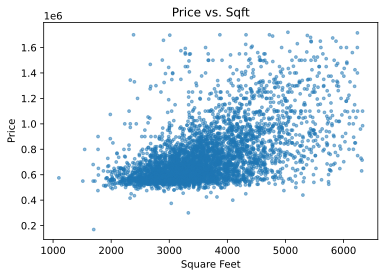

In [ ]:
plt.scatter((data['sqrt_ft']), (data['sold_price']), s=8, alpha=0.5)
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Price vs. Sqft")

plt.show()

In [ ]:
########## target ##############
y = train_data.iloc[:,1]

In [ ]:
y= y.to_numpy()
y.shape

(3813,)

In [ ]:
#####Train data#######
X=train_data[['bedrooms','bathrooms','fireplaces','sqrt_ft', 'classes']].copy()

#####See correlation matrix###########
Xcor=train_data[['sold_price','bedrooms','bathrooms','fireplaces','sqrt_ft', 'classes']].copy()
#X=train_data[['Bath_Bed','fireplaces','sqrt_ft', 'classes']].copy()
corM = Xcor.corr(method ='pearson')
corM

,sold_price,bedrooms,bathrooms,fireplaces,sqrt_ft,classes
sold_price,1.000000,0.118717,0.440681,0.349571,0.546670,0.536956
bedrooms,0.118717,1.000000,0.441306,0.176394,0.485936,-0.238825
bathrooms,0.440681,0.441306,1.000000,0.238267,0.656470,-0.037804
fireplaces,0.349571,0.176394,0.238267,1.000000,0.383153,0.023902
sqrt_ft,0.546670,0.485936,0.656470,0.383153,1.000000,-0.178084
classes,0.536956,-0.238825,-0.037804,0.023902,-0.178084,1.000000


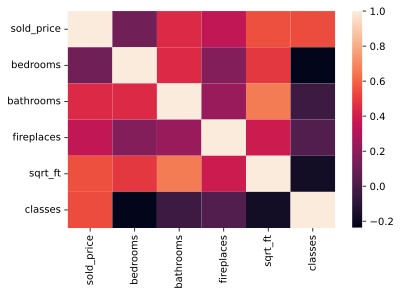

In [ ]:
sns.heatmap(Xcor.corr(), annot = False, fmt='.5g')

In [ ]:
X=X.to_numpy()

In [ ]:
#Linear regression with OLS
myLireg = OurLinearRegression()

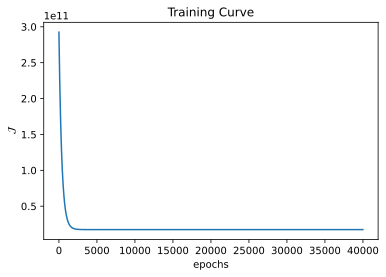

In [ ]:
myLireg.fit(X,y,eta=1e-10,epochs=4e4, show_curve=True)

In [ ]:
def R2(Y, Y_hat):
  return (1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

In [ ]:
y_hat= myLireg.predict(X)

In [ ]:
R2(y, y_hat)
#0.25283972719566483 combined bathrooms and bedrooms
#0.2528476474954354 Bath and bed seperate

0.25284388825702275

In [ ]:
###############################################################Guess here###########################################################
############################################################################################################################################
#bed, bath, fire, sqft, class
x_test = [6,6,0,7200,y_hat2]

In [ ]:
myLireg.predict(x_test)


array([1462332.76069475])

In [ ]:
#KNN regression overfits data and does weird predictions despite r^2 value
knn = KNNregression()

In [ ]:
knn.fit(X,y)

In [ ]:
knn_yhat = knn.predict(X,100)

In [ ]:
R2(y, knn_yhat)

0.9680847279532042

In [ ]:
knn.predict(x_test,500)

array([0., 0., 0., 0., 0.])

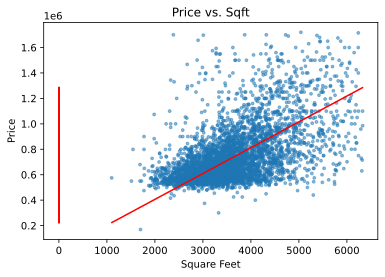

In [ ]:
 plt.scatter((data['sqrt_ft']), data['sold_price'], s=8, alpha=0.5)
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Price vs. Sqft")


 plt.plot(X, y_hat, color='#FF0000')

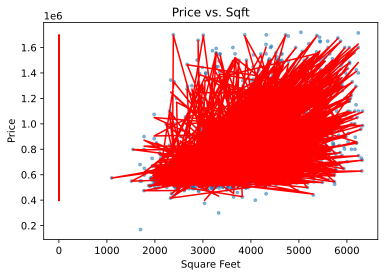

In [ ]:
 plt.scatter((data['sqrt_ft']), data['sold_price'], s=8, alpha=0.5)
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Price vs. Sqft")

 plt.plot(X, knn_yhat, color='#FF0000')

In [ ]:
%%capture
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/Raw_House_Regression.ipynb"